## **PEMODELAN DATA**

---


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from collections.abc import Mapping


In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## 1. Persiapan Dataset

In [3]:
import pandas as pd

file_path = 'dataset_final.csv'

data = pd.read_csv(file_path)

data


,Unnamed: 0.1,Unnamed: 0,full_text,emotion
0,0,0,pengabdian terpuji meskipun terlihat biasa,Neutral
1,1,1,baru mengirim foto,Neutral
2,2,2,apa kabar dunia twitter masihkah selucu seabsu...,Neutral
3,3,3,yah gimana sih yaudah susul sebelumnya sarapan...,Neutral
4,4,4,ka dorg suro beli medium set,Neutral
...,...,...,...,...
57028,28614,28614,cod beli euphoria wonderland la foret fairy ha...,Joy
57029,28615,28615,ลองด cod flash sale ก โล แมคคายกกระสอบ ต กก ต ...,Joy
57030,28616,28616,wal cod an shopee kawa pakai qris lah yuu,Neutral
57031,28617,28617,temukan bisa cod light stick treasure bluetoot...,Neutral


In [4]:
nan_values = data['full_text'].isna().sum()
nan_values

19

In [5]:
# Drop rows with NaN values in the 'full_text' column
data_cleaned = data.dropna(subset=['full_text'])

# Verify that NaN values are removed
nan_values_after = data_cleaned['full_text'].isna().sum()

# Display the result
nan_values_after, data_cleaned.head()

(0,
    Unnamed: 0.1  Unnamed: 0  \
 0             0           0   
 1             1           1   
 2             2           2   
 3             3           3   
 4             4           4   
 
                                            full_text  emotion  
 0         pengabdian terpuji meskipun terlihat biasa  Neutral  
 1                                 baru mengirim foto  Neutral  
 2  apa kabar dunia twitter masihkah selucu seabsu...  Neutral  
 3  yah gimana sih yaudah susul sebelumnya sarapan...  Neutral  
 4                       ka dorg suro beli medium set  Neutral  )

## 2. Preprocessing Data

In [6]:
try:
    from collections.abc import Mapping
except ImportError:
    from collections import Mapping


In [7]:
print(data['emotion'].value_counts())

emotion
Neutral    12984
Joy        12312
Anger      11069
Fear        7997
Sad         7275
Love        5396
Name: count, dtype: int64


<Axes: xlabel='emotion'>

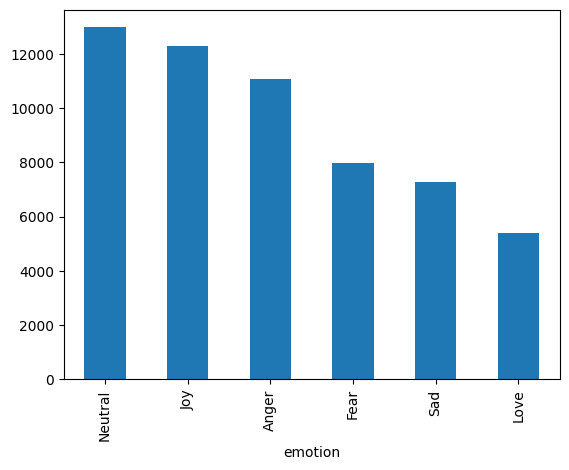

In [29]:
data['emotion'].value_counts().plot(kind='bar')

In [8]:
import scipy
print(scipy.__version__)  # Ensure this prints a version less than 1.13.0

1.12.0


In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split


In [10]:
# Drop rows with NaN values in the 'full_text' column
data_cleaned = data.dropna(subset=['full_text'])

# Extract the text and labels
X = data_cleaned['full_text'].astype(str).tolist()
y = data_cleaned['emotion'].tolist()

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Tokenize data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = 64  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Train a Word2Vec model (modify hyperparameters as needed)
sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# Create an embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.randn(embedding_dim)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Verify the shapes of the processed data
print(X_train_pad.shape, X_val_pad.shape, X_test_pad.shape, y_train.shape, y_val.shape, y_test.shape)


(39909, 64) (8552, 64) (8553, 64) (39909,) (8552,) (8553,)


## 3. Transform Data

In [11]:
print("X train pad :", X_train_pad)
print("X val pad :", X_val_pad)
print("X test pad :", X_test_pad)

X train pad : [[   0    0    0 ...   68  113   68]
 [   0    0    0 ...   16 1619 5534]
 [   0    0    0 ...   41 8335  198]
 ...
 [   0    0    0 ... 2392  312   25]
 [   0    0    0 ...   44 1266  178]
 [   0    0    0 ...   24   22  542]]
X val pad : [[   0    0    0 ...  467 2320    3]
 [   0    0    0 ...   11   41  101]
 [   0    0    0 ...  216  307    7]
 ...
 [   0    0    0 ...  114 3417   97]
 [   0    0    0 ... 2113  196   68]
 [   0    0    0 ...    2  448   14]]
X test pad : [[   0    0    0 ...  696   55 2138]
 [   0    0    0 ... 3263    6 2706]
 [   0    0    0 ...   53 2348 1952]
 ...
 [   0    0    0 ...    9    3   80]
 [   0    0    0 ...    3  136 6573]
 [   0    0    0 ...  341   74 2219]]


## 4. Build and Compile Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Increased embedding size
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # Increased LSTM units
model.add(Dropout(0.5))  # Added dropout for regularization
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Added dense layer for complexity
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # Output layer

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val))

Epoch 1/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 228s 176ms/step - accuracy: 0.3849 - loss: 1.5104 - val_accuracy: 0.6021 - val_loss: 1.1050
Epoch 2/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 231s 185ms/step - accuracy: 0.6667 - loss: 0.9833 - val_accuracy: 0.6401 - val_loss: 1.0175
Epoch 3/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 226s 181ms/step - accuracy: 0.7458 - loss: 0.7760 - val_accuracy: 0.6432 - val_loss: 1.0513
Epoch 4/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 213s 171ms/step - accuracy: 0.7934 - loss: 0.6374 - val_accuracy: 0.6528 - val_loss: 1.0728
Epoch 5/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 212s 170ms/step - accuracy: 0.8357 - loss: 0.5134 - val_accuracy: 0.6408 - val_loss: 1.2723
Epoch 6/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 212s 170ms/step - accuracy: 0.8610 - loss: 0.4323 - val_accuracy: 0.6464 - val_loss: 1.3436
Epoch 7/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - accuracy: 0.8821 - loss: 0.3699 - val_accuracy: 0.6434 - val_loss: 1.5059
Epoch 8/10
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - ac

## 5. Evaluasi Model

In [14]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", accuracy)

# Prediksi dengan data testing
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


268/268 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.6323 - loss: 2.0188
Testing Accuracy: 0.6311236023902893
268/268 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step
Classification Report:
               precision    recall  f1-score   support

       Anger       0.64      0.68      0.66      1606
        Fear       0.60      0.64      0.62      1254
         Joy       0.70      0.69      0.69      1853
        Love       0.56      0.59      0.57       814
     Neutral       0.61      0.54      0.57      1949
         Sad       0.62      0.65      0.64      1077

    accuracy                           0.63      8553
   macro avg       0.62      0.63      0.63      8553
weighted avg       0.63      0.63      0.63      8553



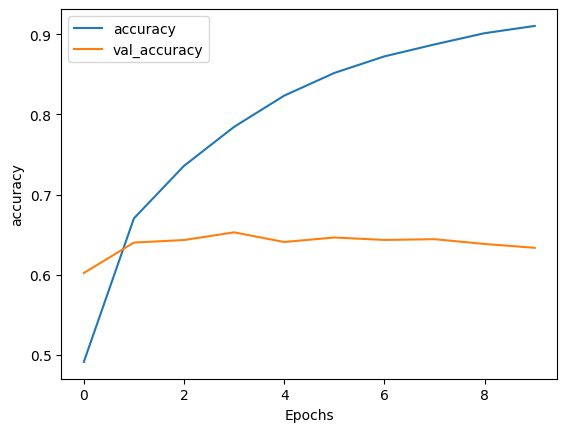

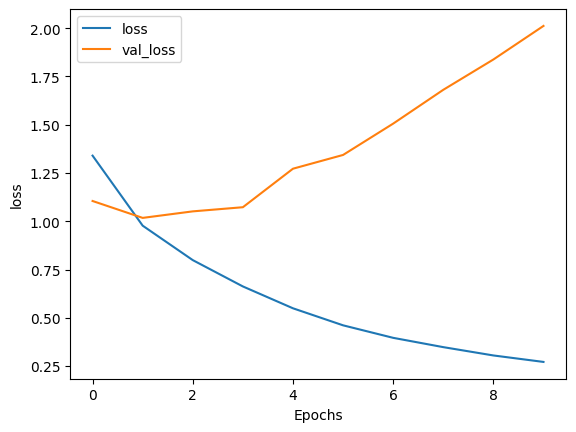

In [15]:
import matplotlib.pyplot as plt

# Fungsi untuk plot grafik training history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot grafik akurasi dan loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
# Evaluasi model dengan data testing
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", accuracy)


268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.6323 - loss: 2.0188
Testing Accuracy: 0.6311236023902893


## 6. Perhitungan F1 Score

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi dengan data testing
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Menampilkan F1 Score secara manual
f1_score = report['weighted avg']['f1-score']
print("F1 Score:", f1_score)


268/268 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step
F1 Score: 0.6303520530099255


## 7. Confusion Matriks

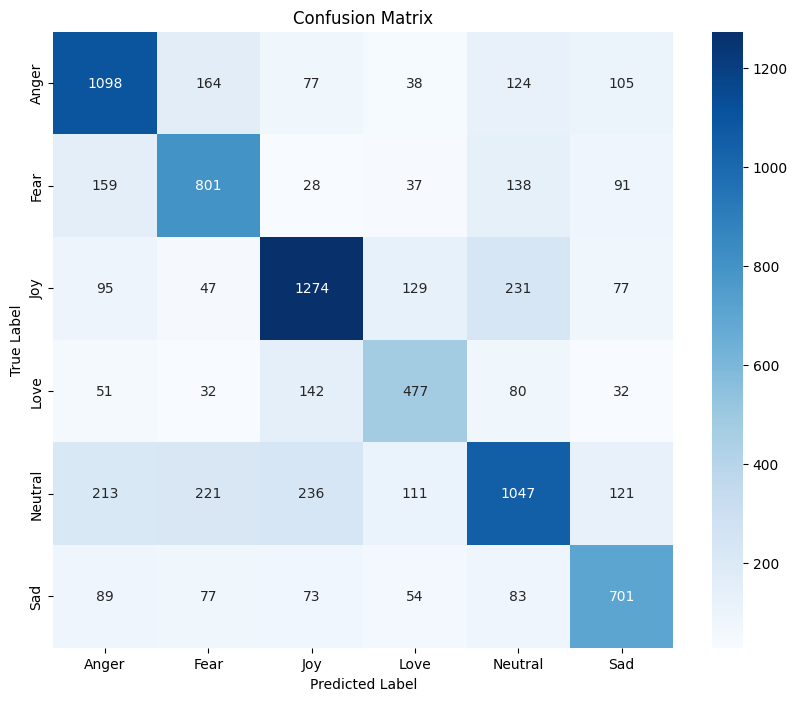

In [19]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [20]:
model.save('model.h5')

## 8. Testing

In [28]:
tweets = [
    "saya senang",
]

# Fungsi untuk mendapatkan label dari prediksi
def get_label(predict):
    if predict == 0:
        return 'anger'
    if predict == 1:
        return 'joy'
    if predict == 2:
        return 'fear'
    if predict == 3:
        return 'love'
    if predict == 4:
        return 'sad'
    if predict == 5:
        return 'neutral'

# Preprocess the tweets
max_length = 100  # Sesuaikan dengan panjang maksimum yang digunakan selama pelatihan
trunc_type = 'post'

# Tokenize and pad sequences
sample_seqs = tokenizer.texts_to_sequences(tweets)
sample_padded = pad_sequences(sample_seqs, maxlen=max_length, truncating=trunc_type)

# Predict labels for each tweet
predictions = model.predict(sample_padded)

# Print predictions and corresponding labels
for i, tweet in enumerate(tweets):
    prediction = np.argmax(predictions[i])
    label = get_label(prediction)
    print(f"Tweet: {tweet}\nPredicted label: {label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Tweet: saya senang
Predicted label: fear

